In [316]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

In [317]:
warnings.filterwarnings("ignore")

In [318]:
plt.style.use('fivethirtyeight')

In [319]:
path = r'C:\Users\artoe\Documents\DataAnalytics\Data Immersion\Exercises\Achievement 6\data'

#### Importing time-series data.

In [321]:
#importing calendar data
df_calendar = pd.read_csv(os.path.join(path,'calendar_checked.csv'),index_col=False)

In [322]:
df_calendar.columns

Index(['Unnamed: 0', 'listing_id', 'date', 'available', 'price'], dtype='object')

In [323]:
df_calendar.drop(columns='Unnamed: 0', inplace=True)

In [324]:
df_calendar.rename(columns={'listing_id':'id'}, inplace=True)

In [325]:
df_calendar.dtypes

id             int64
date          object
available       bool
price        float64
dtype: object

In [326]:
#selecting subset to use, so that there is an equal number of listings for each date
df_calendar_sub = df_calendar.loc[(df_calendar['date'] > '2018-12-06') & (df_calendar['date'] < '2019-12-06')]

In [327]:
#importing datetime function
from datetime import datetime

In [328]:
#add datetime column
df_calendar_sub['datetime'] = pd.to_datetime(df_calendar_sub['date'])
df_calendar_sub.head()

,id,date,available,price,datetime
0,2818,2019-12-05,False,NaN,2019-12-05
1,73208,2019-08-30,False,NaN,2019-08-30
2,73208,2019-08-29,False,NaN,2019-08-29
3,73208,2019-08-28,False,NaN,2019-08-28
4,73208,2019-08-27,False,NaN,2019-08-27


In [329]:
df_calendar_sub.sort_values('datetime', ascending=True, inplace=True)

#### Aggregating variables by day

In [331]:
#available listings by day
df_calendar_sub['availability_daily'] = (df_calendar_sub.groupby('datetime')['available'].transform(np.sum))/(df_calendar_sub.groupby('datetime')['available'].transform('count'))

In [332]:
#average price by day
df_calendar_sub['average_price_day'] = df_calendar_sub.groupby('datetime')['price'].transform(np.mean)

In [333]:
#percentage of availability by day
df_calendar_sub['percent_available_by_day'] = df_calendar_sub['availability_daily']*100

In [334]:
df_calendar_sub.columns

Index(['id', 'date', 'available', 'price', 'datetime', 'availability_daily',
       'average_price_day', 'percent_available_by_day'],
      dtype='object')

In [335]:
df_calendar_sub.head(60)

,id,date,available,price,datetime,availability_daily,average_price_day,percent_available_by_day
7310949,29979667,2018-12-07,True,139.0,2018-12-07,0.071093,224.468399,7.109336
522553,1943465,2018-12-07,False,NaN,2018-12-07,0.071093,224.468399,7.109336
7133452,30041745,2018-12-07,False,NaN,2018-12-07,0.071093,224.468399,7.109336
6877623,28957881,2018-12-07,False,NaN,2018-12-07,0.071093,224.468399,7.109336
5526882,22168849,2018-12-07,False,NaN,2018-12-07,0.071093,224.468399,7.109336
1202752,5547642,2018-12-07,False,NaN,2018-12-07,0.071093,224.468399,7.109336
2280161,10118060,2018-12-07,False,NaN,2018-12-07,0.071093,224.468399,7.109336
1202487,5611174,2018-12-07,False,NaN,2018-12-07,0.071093,224.468399,7.109336
3929255,16622510,2018-12-07,False,NaN,2018-12-07,0.071093,224.468399,7.109336
3232684,14003632,2018-12-07,False,NaN,2018-12-07,0.071093,224.468399,7.109336


In [368]:
df_calendar_sub.drop(columns=['id','available','price','date'], inplace=True)

KeyError: "['id', 'available', 'price', 'date'] not found in axis"

In [356]:
df_calendar_sub.duplicated().sum()

7290556

In [358]:
df_calendar_nodups = df_calendar_sub.drop_duplicates()

In [372]:
df_calendar_nodups.drop(columns='availability_daily', inplace=True)

In [374]:
df_calendar_nodups.head()

,average_price_day,percent_available_by_day
datetime,,
2018-12-07,224.468399,7.109336
2018-12-08,227.502031,8.602097
2018-12-09,184.010435,14.353470
2018-12-10,172.021444,16.530205
2018-12-11,170.296101,17.029456


In [376]:
df_calendar_nodups.shape

(364, 2)

In [378]:
df_calendar_nodups = df_calendar_nodups.set_index('datetime')

KeyError: "None of ['datetime'] are in the columns"

In [380]:
df_calendar_nodups.head()

,average_price_day,percent_available_by_day
datetime,,
2018-12-07,224.468399,7.109336
2018-12-08,227.502031,8.602097
2018-12-09,184.010435,14.353470
2018-12-10,172.021444,16.530205
2018-12-11,170.296101,17.029456


#### Plotting time-series data

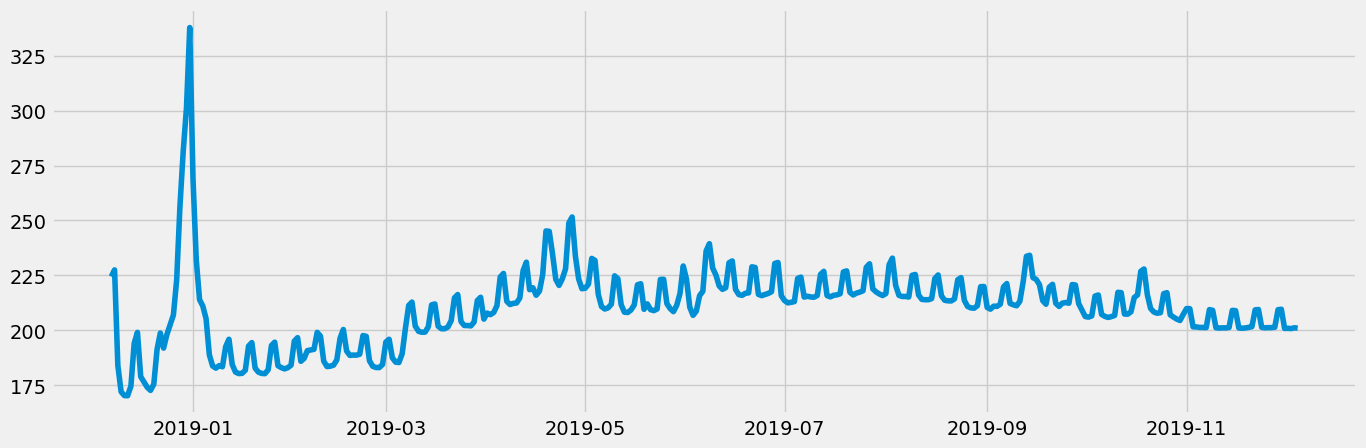

In [384]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_calendar_nodups['average_price_day'])

##### There is a spike in daily average price in January 2019. Aside from that, the data follows an upward trend until May, before decreasing and levelling throughout the next months until October. There also appears to be a steady cycle present throughout the data.

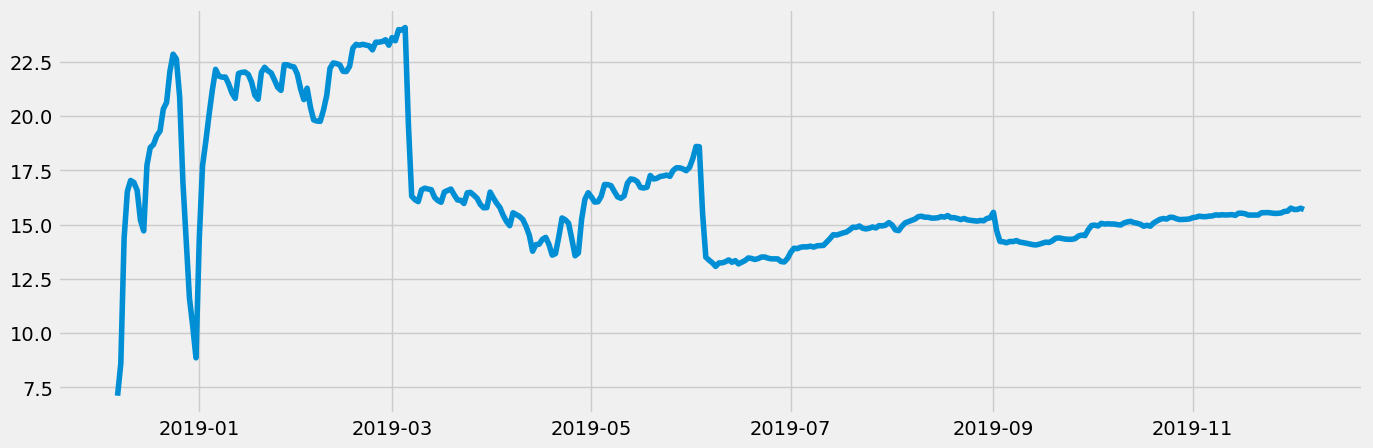

In [386]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_calendar_nodups['percent_available_by_day'])

##### The daily vacancy rate fluctuates sharply between December and January (perhaps due to this being shortly after the data collection date). Vacancy is highest between January and March 2019, before dropping sharply, increasing slightly and dropping again in June. The rest of the year shows a relatively slow increase in vacancy.
##### A similar-looking cycle as found in the daily price data can also be observed here, particularly for the first half of the year. 

#### Decomposition Analysis

##### Daily Average Price

In [395]:
decomposition = sm.tsa.seasonal_decompose(df_calendar_nodups['average_price_day'], model='additive', period=1)

In [397]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

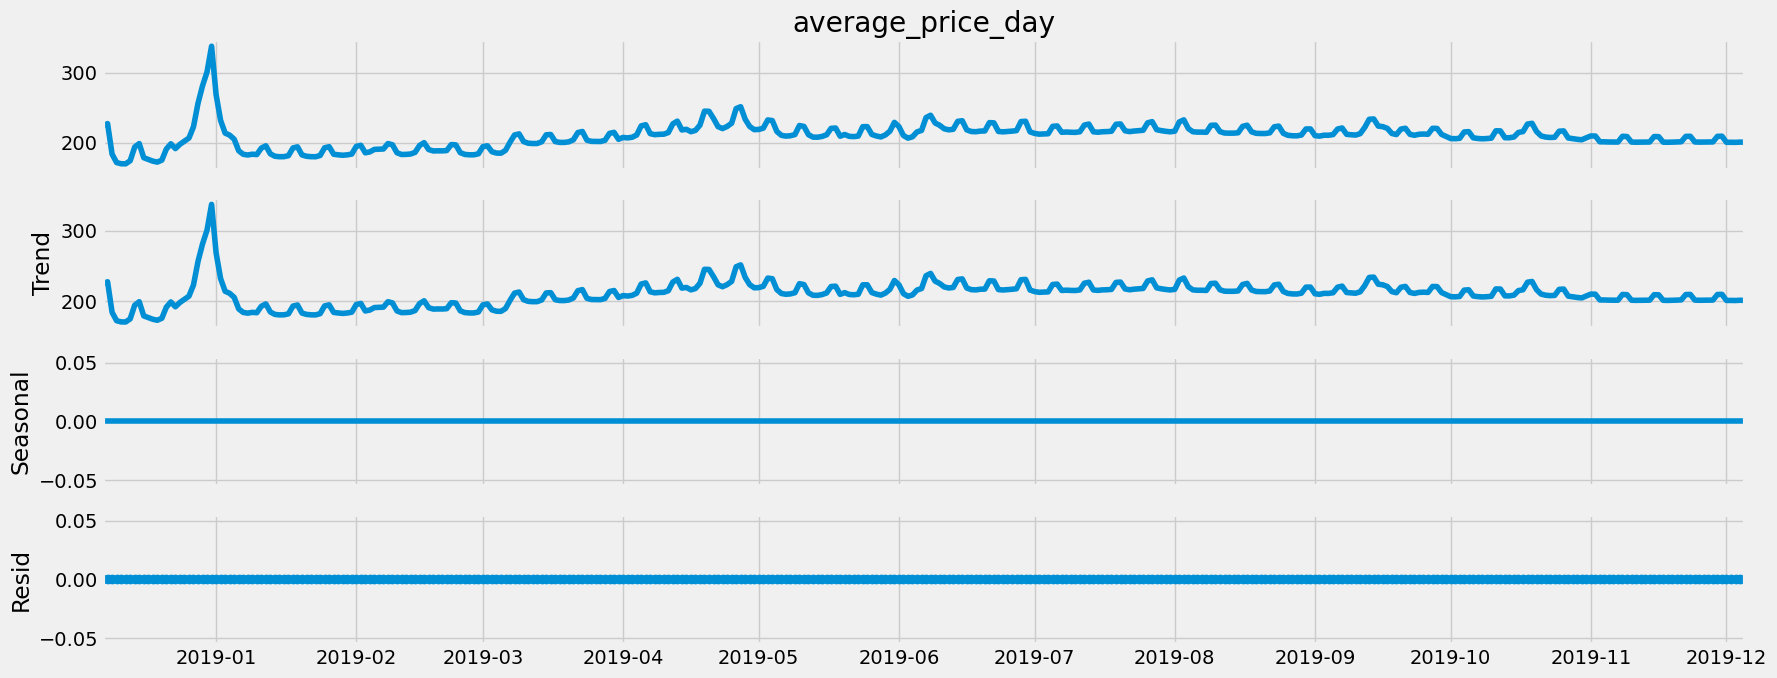

In [399]:
decomposition.plot()
plt.show()

##### No seasonality observed and very little noise. Because of this, the data and trend lines match. The sharp spike in January can also be observed here.

##### Daily Vacancy

In [403]:
decomposition_vacancy = sm.tsa.seasonal_decompose(df_calendar_nodups['percent_available_by_day'], model='additive', period=1)

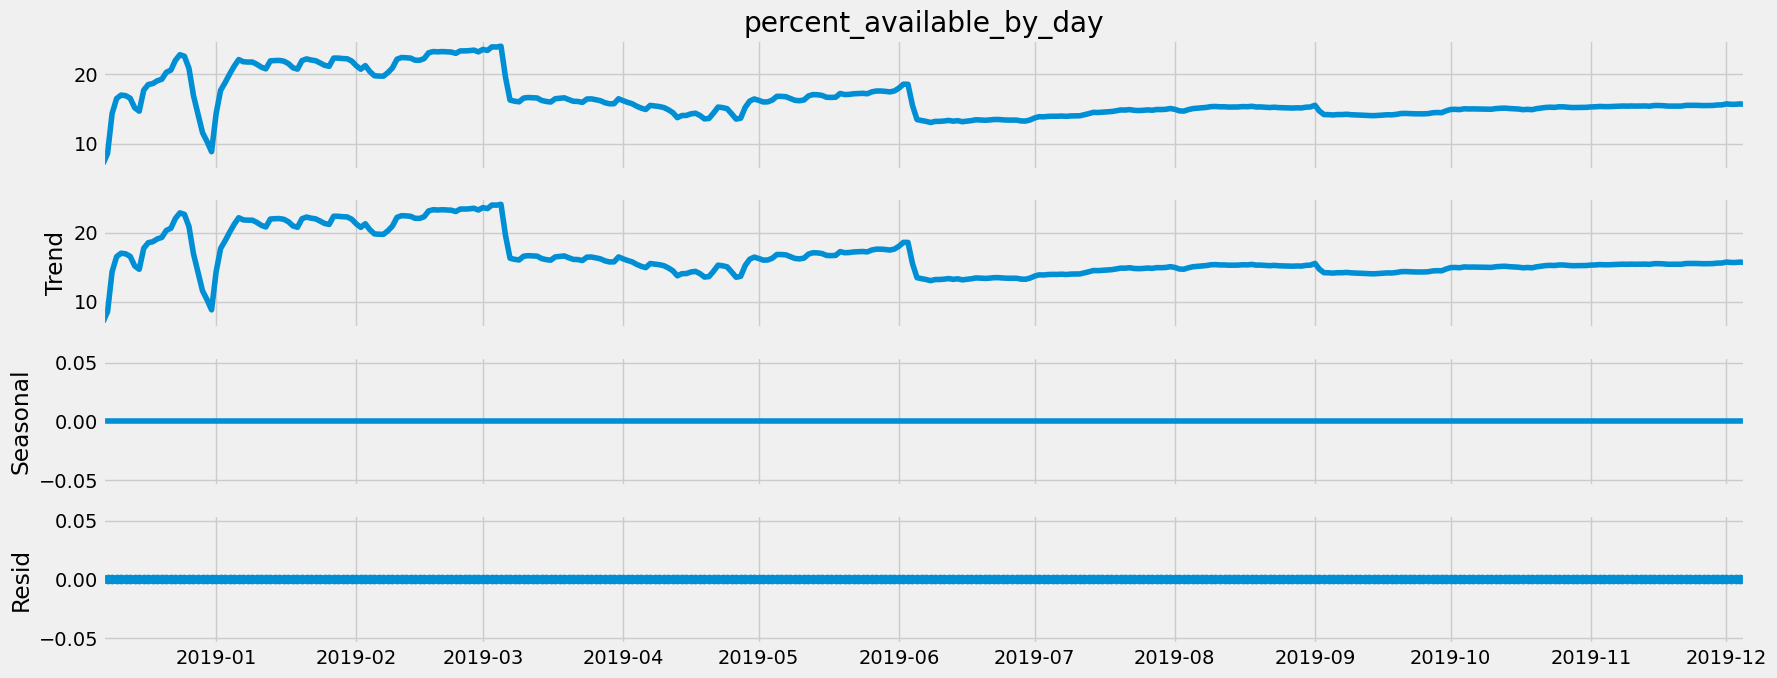

In [405]:
decomposition_vacancy.plot()
plt.show()

##### Similar to the price data, the data and trend line are identical. There is a sharp drop in value that corresponds to the point at which price data spikes.
##### There is also no seasonality or noise detected.

#### Testing for Stationarity

In [408]:
from statsmodels.tsa.stattools import adfuller

In [410]:
def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

#### Stationarity (Average Daily Price)

In [413]:
dickey_fuller(df_calendar_nodups['average_price_day'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.557814
p-value                          0.006621
Number of Lags Used             15.000000
Number of Observations Used    348.000000
Critical Value (1%)             -3.449282
Critical Value (5%)             -2.869881
Critical Value (10%)            -2.571214
dtype: float64


##### The test statistic is less than any of the critical values. This means that the data is very stationary would not require any further steps to stationarize it. 
##### The p-value is 0.0066, far less than 0.05 and therefore indicative of a highly significant test result.

#### Stationarity (Daily Vacancy)

In [416]:
dickey_fuller(df_calendar_nodups['percent_available_by_day'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.568387
p-value                          0.499452
Number of Lags Used             17.000000
Number of Observations Used    346.000000
Critical Value (1%)             -3.449392
Critical Value (5%)             -2.869930
Critical Value (10%)            -2.571240
dtype: float64


##### The test statistic is greater than any of the critical values. This means that this data is not stationary and would require further measures to stationarize it.
##### The p-value is 0.499, much greater than 0.05 and therefore not a very significant test result.

#### Differencing Daily Vacancy Data

In [431]:
df_vacancy_diff = df_calendar_nodups['percent_available_by_day'].shift(1)

In [433]:
#check for nulls
df_vacancy_diff.isnull().sum()

1

In [435]:
df_vacancy_diff.dropna(inplace=True)

##### Check for stationarity one more time after differencing

In [438]:
dickey_fuller(df_vacancy_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.568446
p-value                          0.499422
Number of Lags Used             17.000000
Number of Observations Used    345.000000
Critical Value (1%)             -3.449447
Critical Value (5%)             -2.869954
Critical Value (10%)            -2.571253
dtype: float64


In [440]:
#this data is still not stationary. will attempt to log transform it.
df_vacancy_log = np.log(df_vacancy_diff)

In [442]:
dickey_fuller(df_vacancy_log)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.719114
p-value                          0.421292
Number of Lags Used             17.000000
Number of Observations Used    345.000000
Critical Value (1%)             -3.449447
Critical Value (5%)             -2.869954
Critical Value (10%)            -2.571253
dtype: float64


In [452]:
#second round of differencing
df_vacancy_2diff = df_vacancy_log.shift(1)

In [454]:
#check for nulls
df_vacancy_2diff.isnull().sum()

1

In [456]:
#drop nulls
df_vacancy_2diff.dropna(inplace=True)

In [458]:
dickey_fuller(df_vacancy_2diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.714364
p-value                          0.423727
Number of Lags Used             17.000000
Number of Observations Used    344.000000
Critical Value (1%)             -3.449503
Critical Value (5%)             -2.869979
Critical Value (10%)            -2.571266
dtype: float64


In [460]:
#apply second log transformation
df_vacancy_2log = np.log(df_vacancy_2diff)

In [462]:
dickey_fuller(df_vacancy_2log)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.795736
p-value                          0.382581
Number of Lags Used             17.000000
Number of Observations Used    344.000000
Critical Value (1%)             -3.449503
Critical Value (5%)             -2.869979
Critical Value (10%)            -2.571266
dtype: float64


In [464]:
#3rd round of differencing
df_vacancy_3diff = df_vacancy_2log.shift(1)

In [466]:
df_vacancy_3diff.dropna(inplace=True)

In [468]:
dickey_fuller(df_vacancy_3diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.791711
p-value                          0.384585
Number of Lags Used             17.000000
Number of Observations Used    343.000000
Critical Value (1%)             -3.449560
Critical Value (5%)             -2.870004
Critical Value (10%)            -2.571279
dtype: float64


In [470]:
#3rd round of log transformation
df_vacancy_3log = np.log(df_vacancy_3diff)

In [472]:
dickey_fuller(df_vacancy_3log)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.039413
p-value                          0.031374
Number of Lags Used              5.000000
Number of Observations Used    355.000000
Critical Value (1%)             -3.448906
Critical Value (5%)             -2.869716
Critical Value (10%)            -2.571126
dtype: float64


##### After 3 iterations each of differencing and log transformation, the daily vacancy data is now stationary. The test statistic of -3.04 is smaller than the critical values for both 5% and 10%. The p-value is now 0.03, which makes this a significant test result.

#### Check for autocorrelation

In [423]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### Daily Average Price

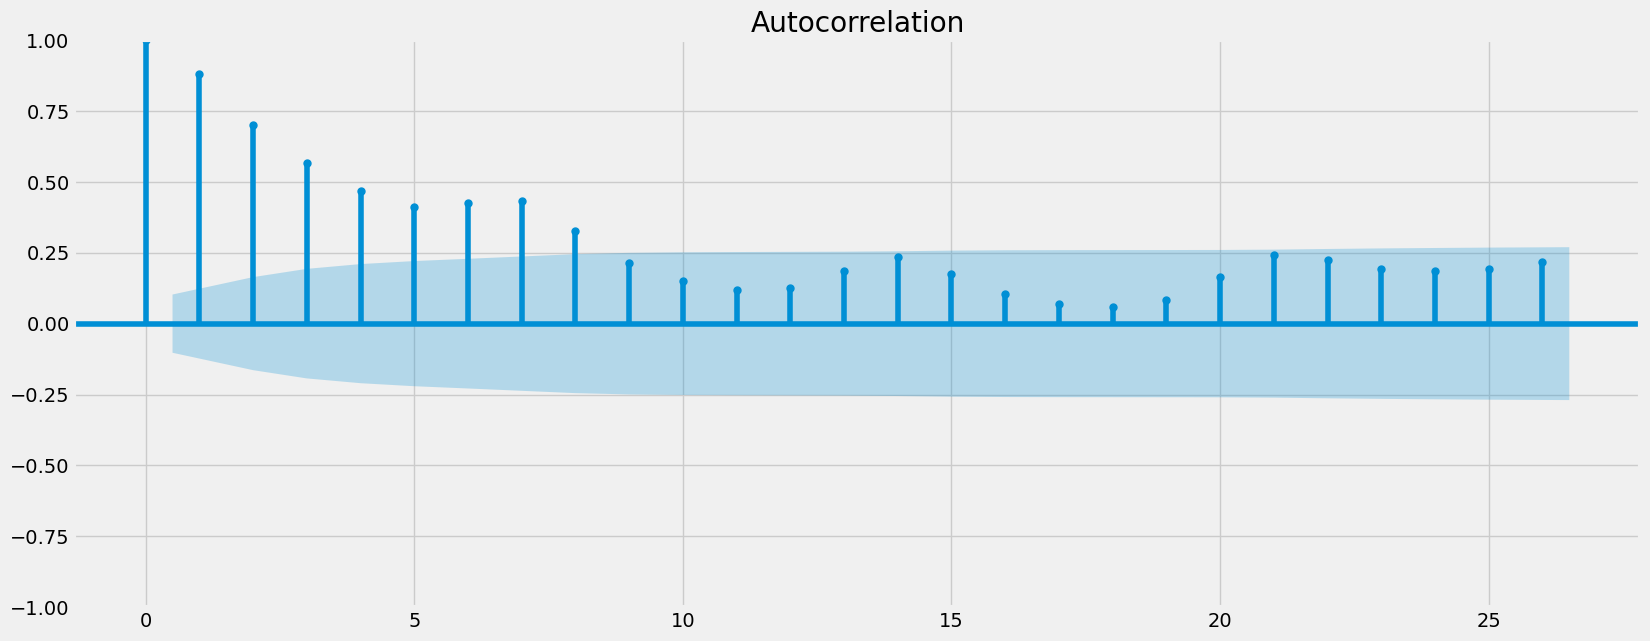

In [425]:
plot_acf(df_calendar_nodups['average_price_day'])
plt.show()

##### There are 9 lines outside the confidence interval. This indicates that the stationarity of data is weak, though not weak enough for it to be considered non-stationary.

#### Daily Vacancy

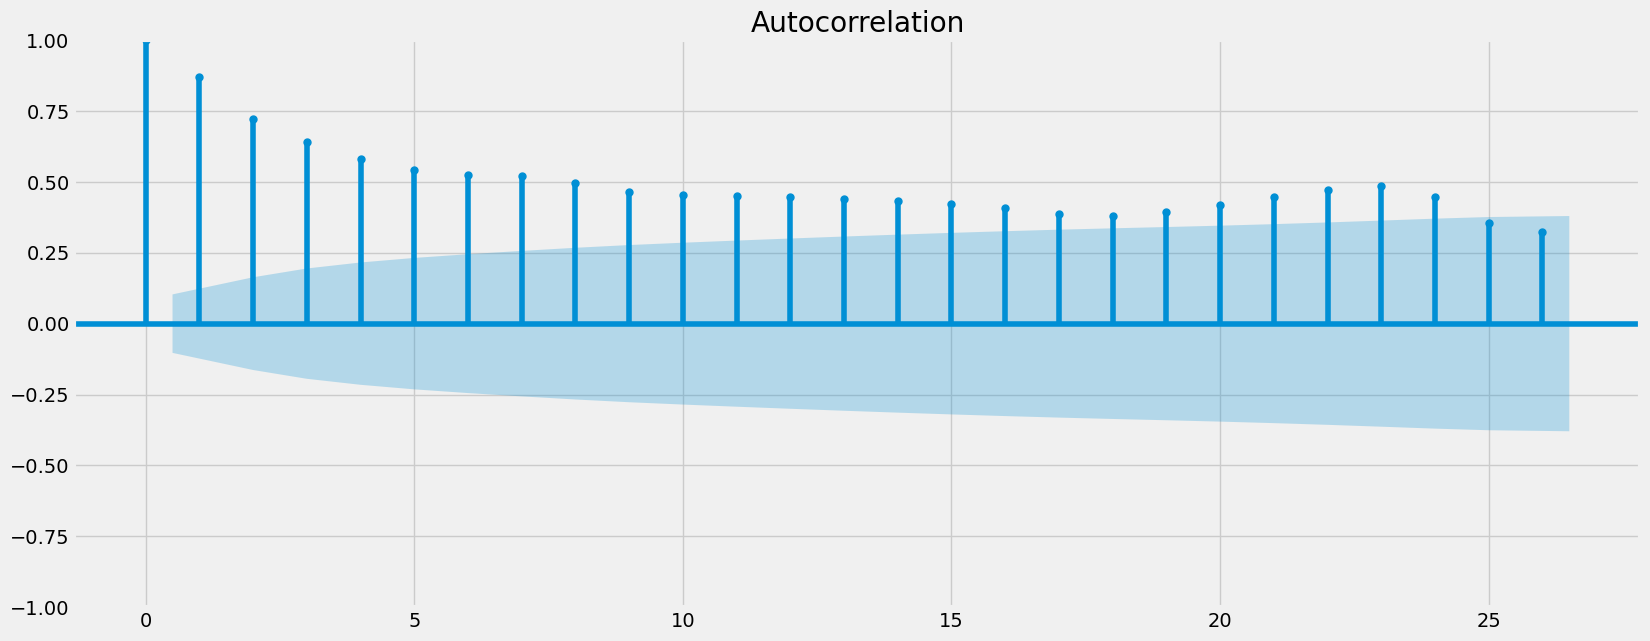

In [488]:
plot_acf(df_vacancy_3log)
plt.show()

##### Despite the Dickey-Fuller test results indicating stationarity after 3 round each of differencing and log transformation, there is still significant autocorrelation in this data.
##### We can test for autocorrelation again after another round of differencing and log transformation

In [492]:
#differencing
df_vacancy_4diff = df_vacancy_3log.shift(1)
df_vacancy_4diff.dropna(inplace=True)

In [494]:
#log transform
df_vacancy_4log = np.log(df_vacancy_4diff)
df_vacancy_4log.dropna(inplace=True)

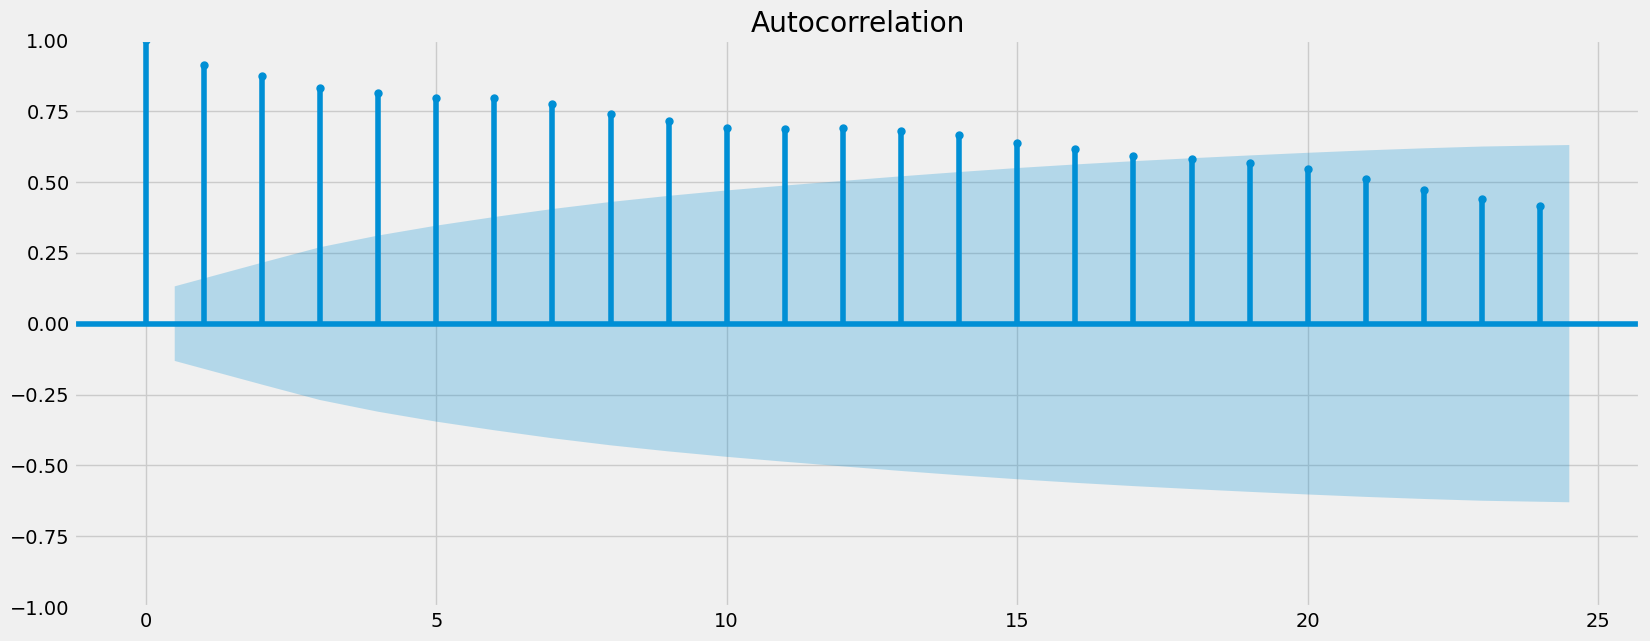

In [496]:
#plotting again
plot_acf(df_vacancy_4log)
plt.show()

##### There is some improvement in the stationarity, as fewer lines fall outside the confidence interval.

In [499]:
#5th differencing
df_vacancy_5diff = df_vacancy_4log.shift(1)
df_vacancy_5diff.dropna(inplace=True)

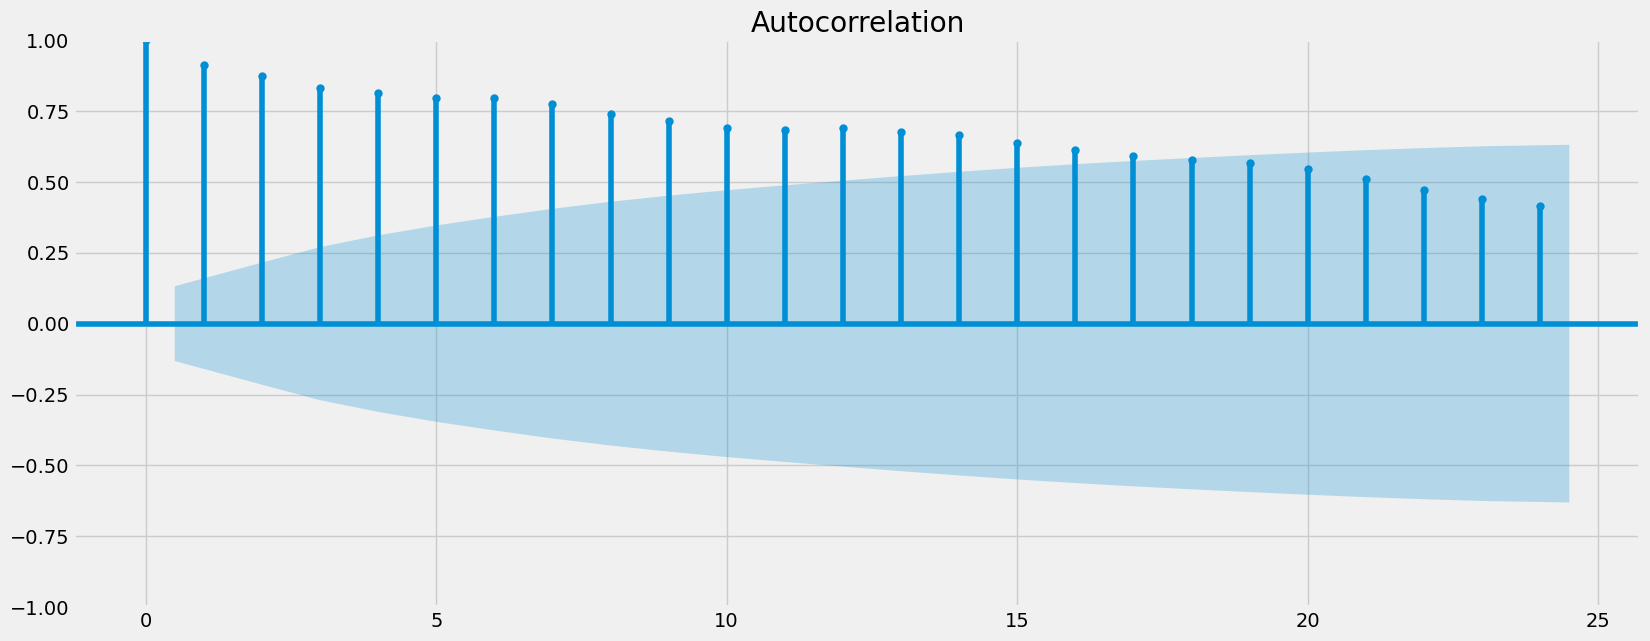

In [523]:
plot_acf(df_vacancy_5diff)
plt.show()

In [525]:
#6th differencing
df_vacancy_6diff = df_vacancy_5diff.shift(1)

In [527]:
df_vacancy_6diff.dropna(inplace=True)

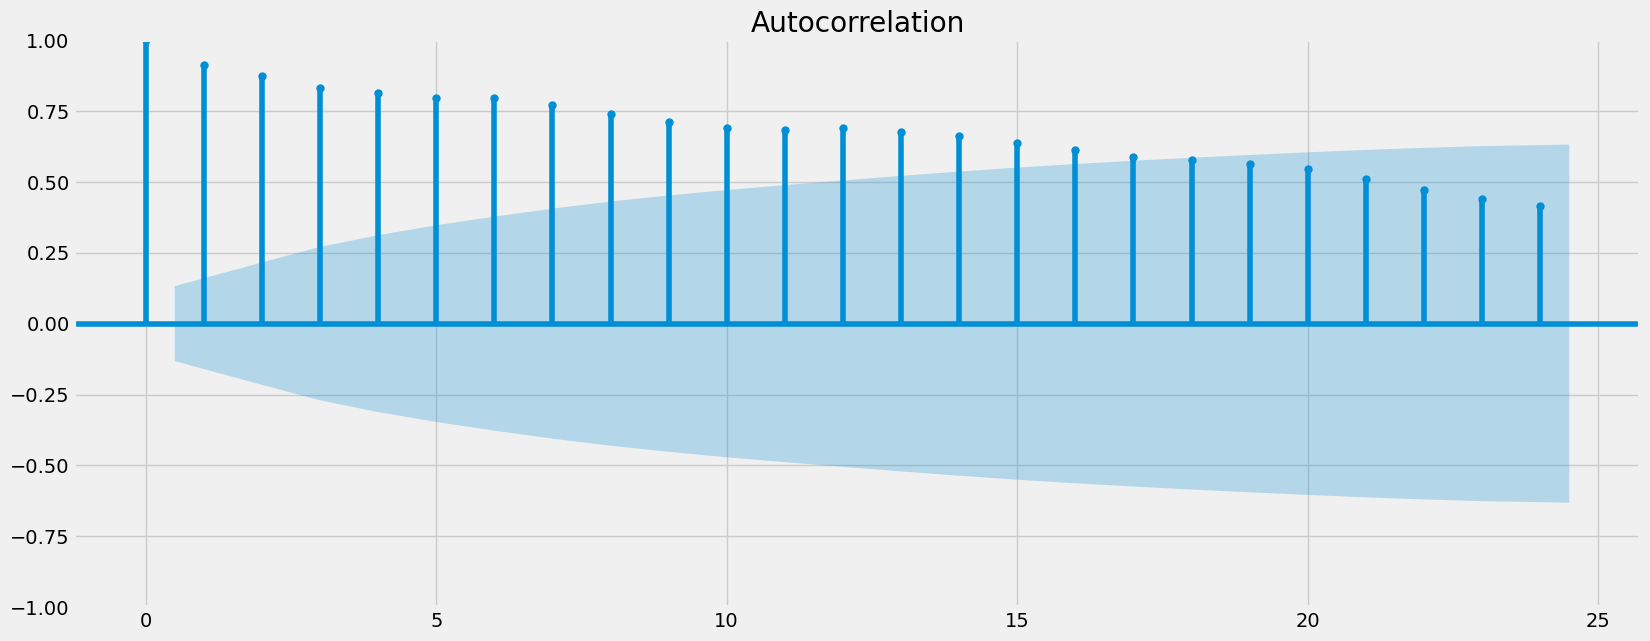

In [529]:
plot_acf(df_vacancy_6diff)
plt.show()

In [531]:
#differencing until 10
df_vacancy_finaldiff = df_vacancy_6diff.shift(4)
df_vacancy_finaldiff.dropna(inplace=True)

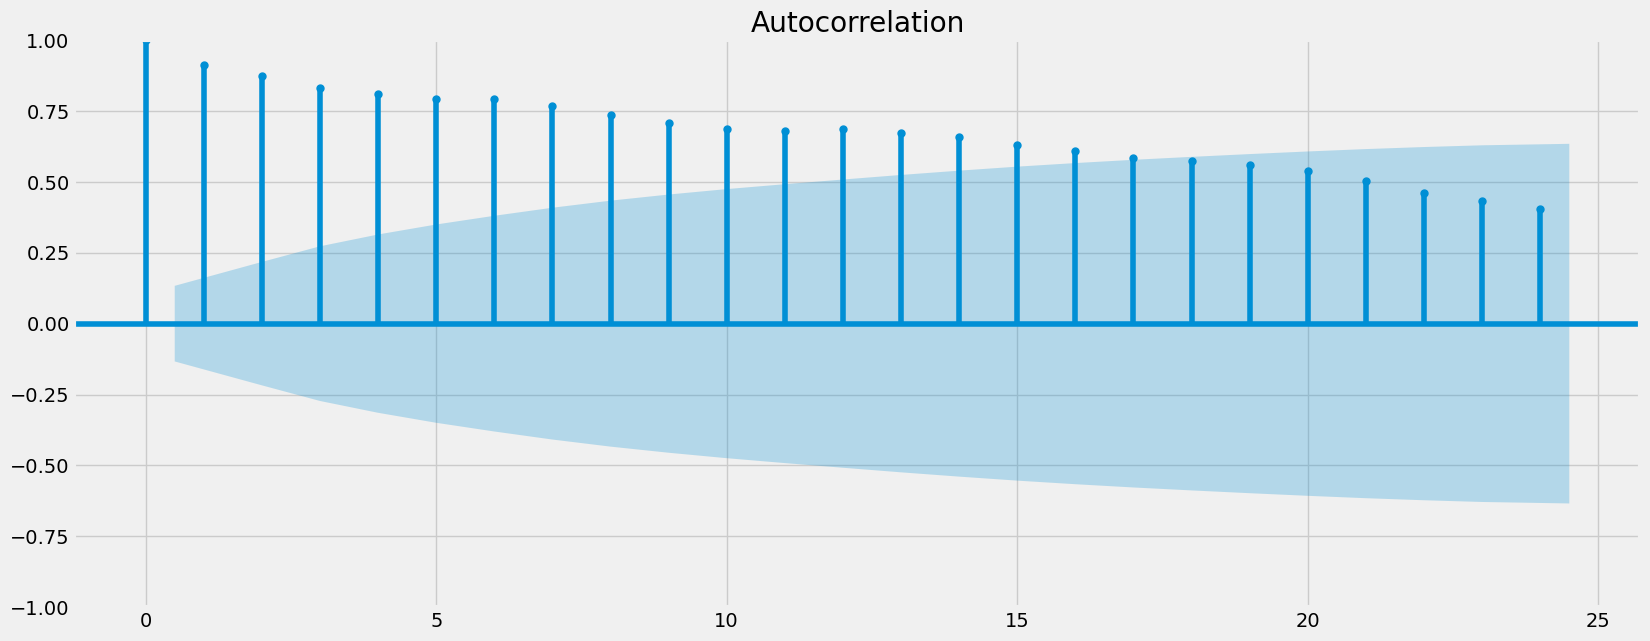

In [533]:
plot_acf(df_vacancy_finaldiff)
plt.show()

In [547]:
#differencing by 100
df_vacancy_diff100 = df_vacancy_finaldiff.shift(90)
df_vacancy_diff100.dropna(inplace=True)

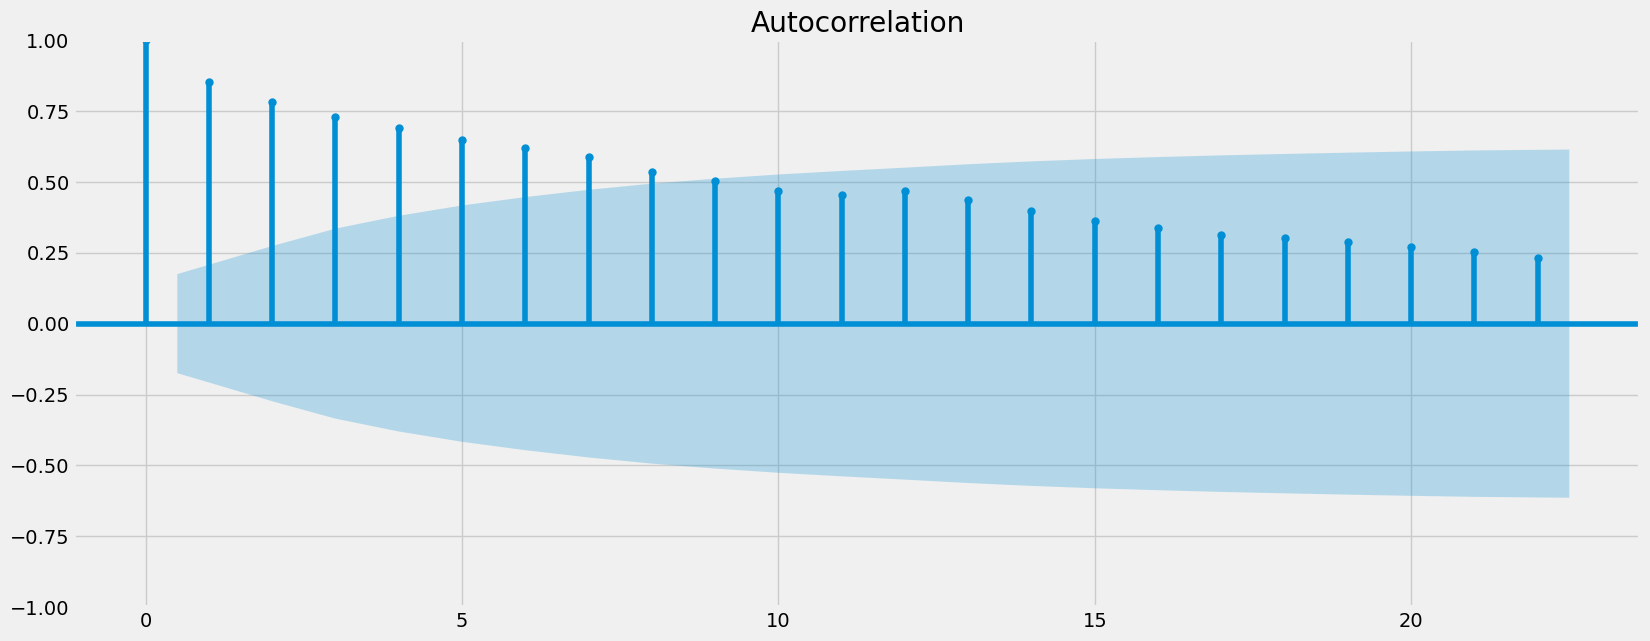

In [549]:
plot_acf(df_vacancy_diff100)
plt.show()

In [551]:
#conducting a dickey-fuller test on this highly-differenced data
dickey_fuller(df_vacancy_diff100)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.002431
p-value                          0.752377
Number of Lags Used             12.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


##### Interestingly enough, the data scored far worse on the Dickey-Fuller test after several rounds of differencing and log transformation, despite fewer autocorrelations appearing each time.